# Linear Regression

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt, statsmodels.api as sm

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [3]:
from ISLP import load_data
from ISLP.models import ModelSpec as MS, summarize, poly

In [4]:
import warnings
warnings.filterwarnings("ignore")

## Q8

In [5]:
Auto = load_data("Auto")

In [6]:
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [7]:
design = MS(["horsepower"])
X = design.fit_transform(Auto)
y = Auto["mpg"]
model1 = sm.OLS(y, X)
result1 = model1.fit()
summarize(result1)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [8]:
new_df = pd.DataFrame({"horsepower": [98]})
newX = design.transform(new_df)
new_pred = result1.get_prediction(newX)
new_pred.predicted_mean

array([24.46707715])

In [9]:
new_pred.conf_int(alpha=0.05)

array([[23.97307896, 24.96107534]])

In [10]:
new_pred.conf_int(alpha=0.05, obs=True)

array([[14.80939607, 34.12475823]])

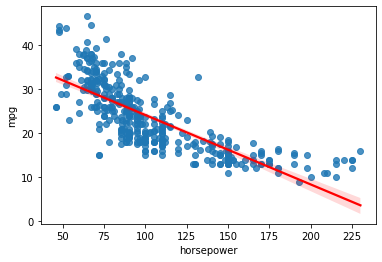

In [11]:
sns.regplot(x="horsepower", y="mpg", data=Auto, line_kws={"color": "red"})

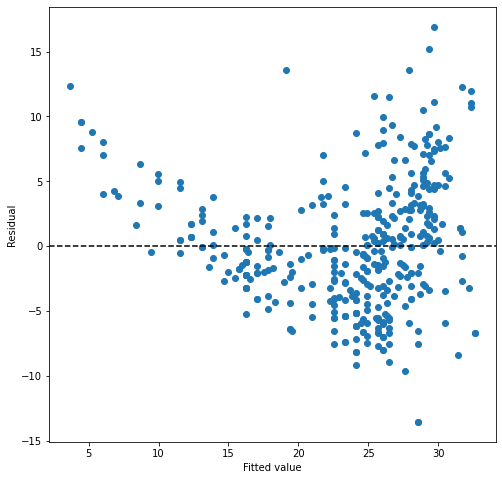

In [12]:
ax = plt.subplots(figsize=(8, 8))[1]
ax.scatter(result1.fittedvalues, result1.resid)
ax.set_xlabel("Fitted value")
ax.set_ylabel("Residual")
ax.axhline(0, c="k", ls="--")

115

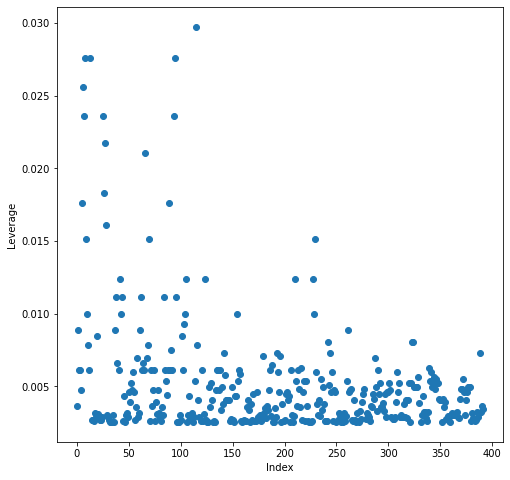

In [13]:
infl = result1.get_influence()
ax = plt.subplots(figsize=(8, 8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel("Index")
ax.set_ylabel("Leverage")
np.argmax(infl.hat_matrix_diag)

## Q9

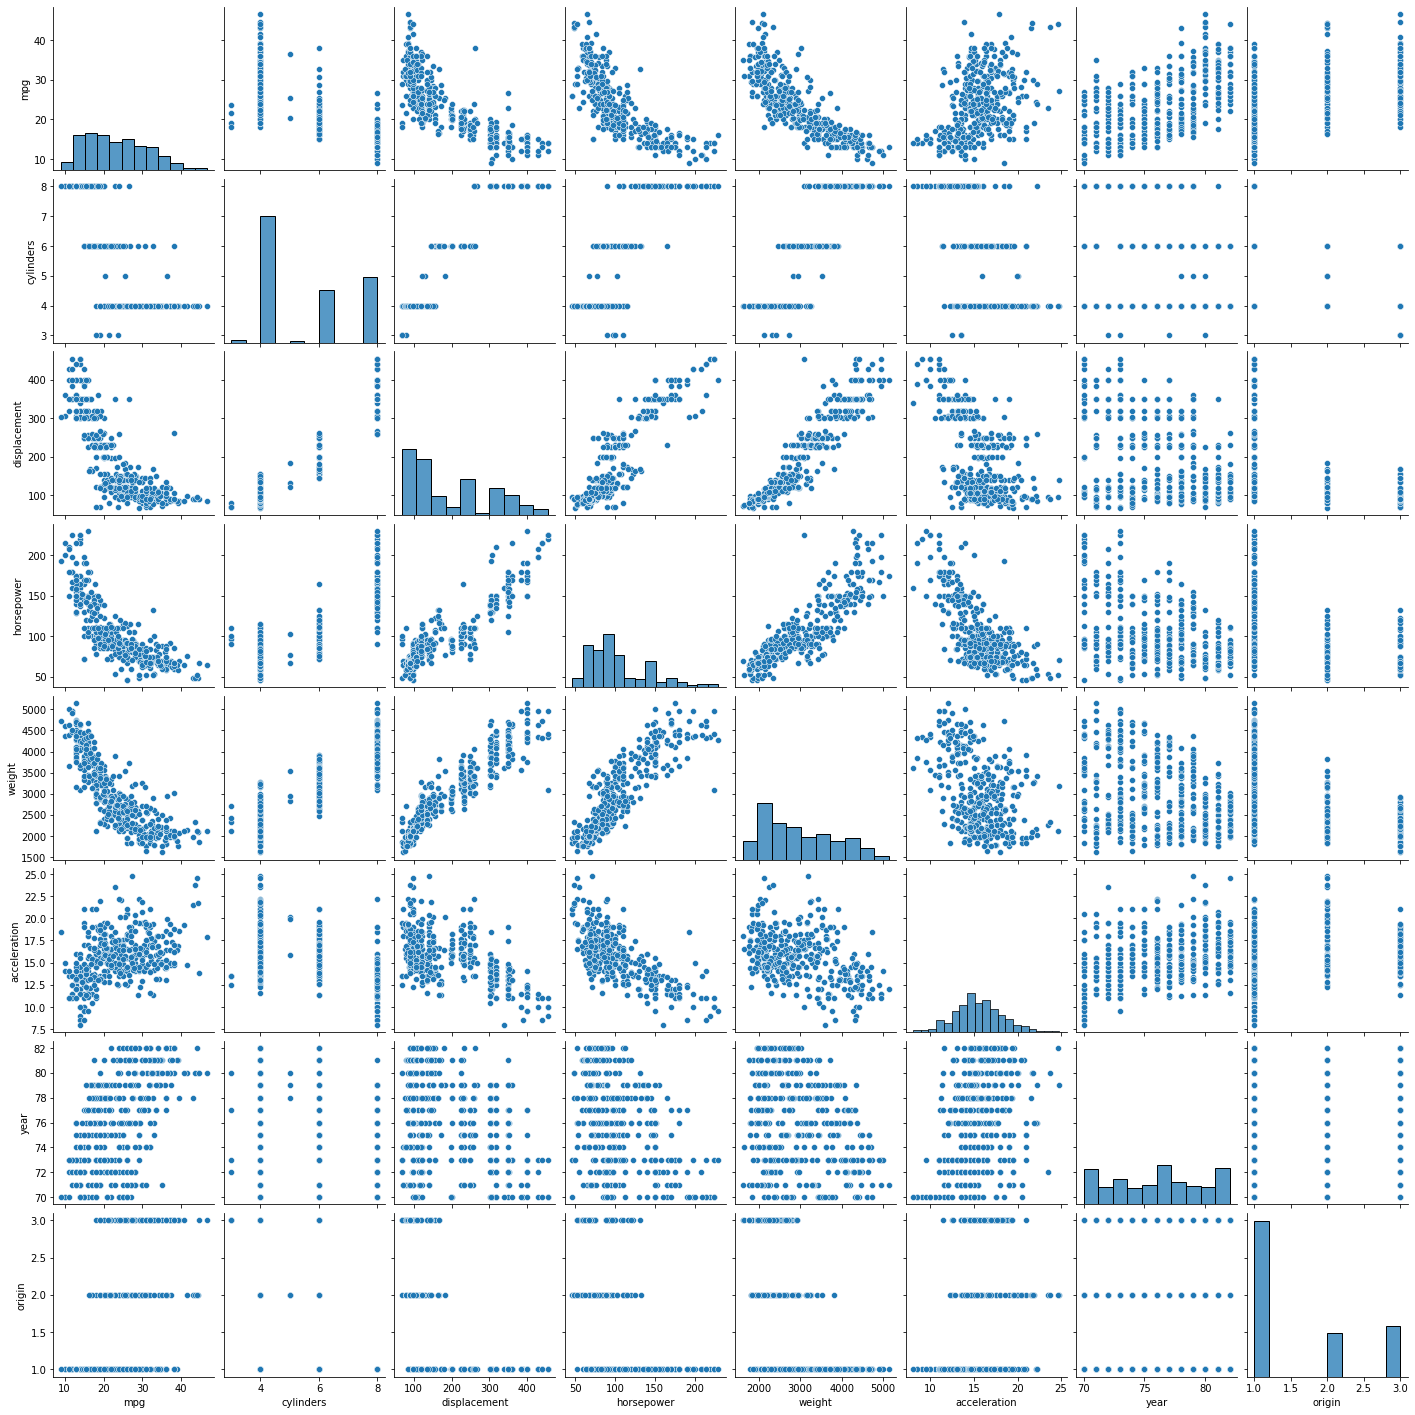

In [14]:
sns.pairplot(Auto)

In [15]:
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


<Axes: >

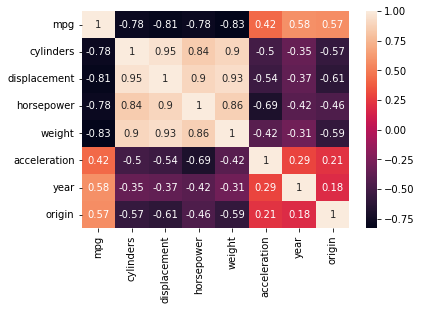

In [16]:
sns.heatmap(Auto.corr(), annot=True)

In [17]:
X = MS(Auto.columns.drop(["mpg", "name"])).fit_transform(Auto)
y = Auto["mpg"]
model2 = sm.OLS(y, X)
results2 = model2.fit()
summarize(results2)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [18]:
anova_lm(results2, result1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,384.0,4252.212530,0.0,NaN,NaN,NaN
1,390.0,9385.915872,-6.0,-5133.703341,35.552281,NaN


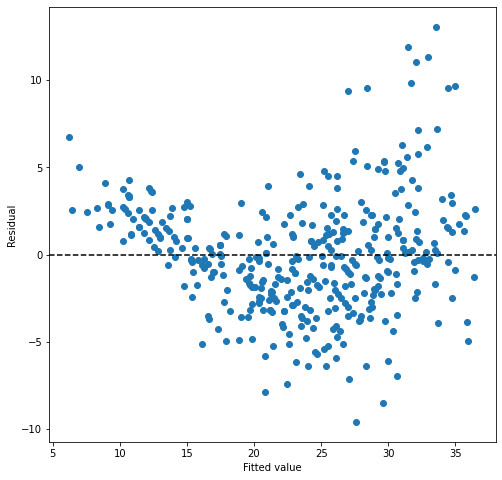

In [19]:
ax = plt.subplots(figsize=(8, 8))[1]
ax.scatter(results2.fittedvalues, results2.resid)
ax.set_xlabel("Fitted value")
ax.set_ylabel("Residual")
ax.axhline(0, c="k", ls="--")

13

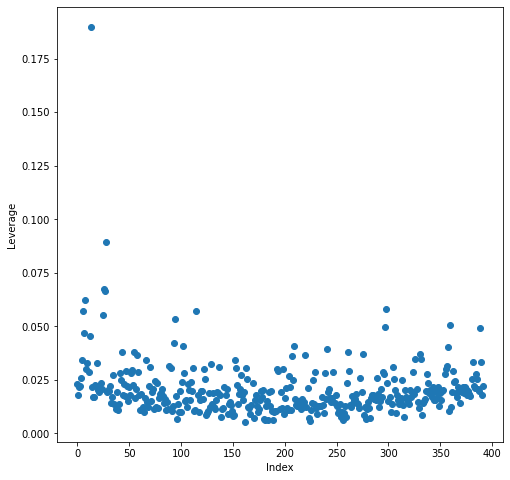

In [20]:
infl = results2.get_influence()
ax = plt.subplots(figsize=(8, 8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel("Index")
ax.set_ylabel("Leverage")
np.argmax(infl.hat_matrix_diag)

In [21]:
terms = list(Auto.columns.drop(["mpg", "name"]))
interaction_terms = [
    ("horsepower", "weight"),
    ("cylinders", "year"),
    ("acceleration", "displacement"),
]
terms.append(("horsepower", "weight"))
terms.append(("cylinders", "year"))
terms.append(("acceleration", "displacement"))
# terms
X = MS(terms).fit_transform(Auto)
y = Auto["mpg"]
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,-46.154300,12.415000,-3.718,0.000
cylinders,8.152100,2.275000,3.584,0.000
displacement,0.021700,0.011000,2.044,0.042
horsepower,-0.205100,0.024000,-8.670,0.000
weight,-0.009300,0.001000,-10.410,0.000
acceleration,0.197500,0.137000,1.446,0.149
year,1.297800,0.153000,8.479,0.000
origin,0.805200,0.247000,3.266,0.001
horsepower:weight,0.000044,0.000006,7.571,0.000
cylinders:year,-0.104100,0.029000,-3.554,0.000


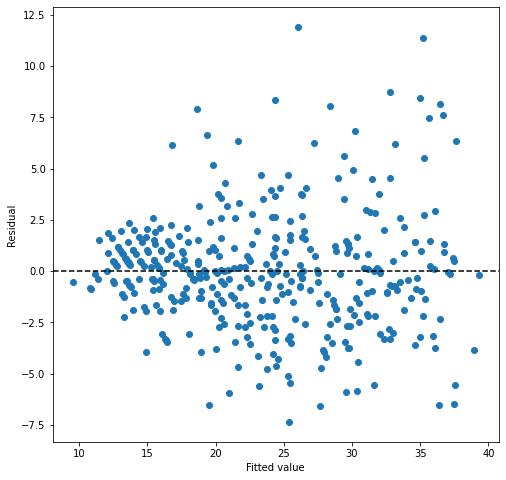

In [22]:
ax = plt.subplots(figsize=(8, 8))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel("Fitted value")
ax.set_ylabel("Residual")
ax.axhline(0, c="k", ls="--")

13

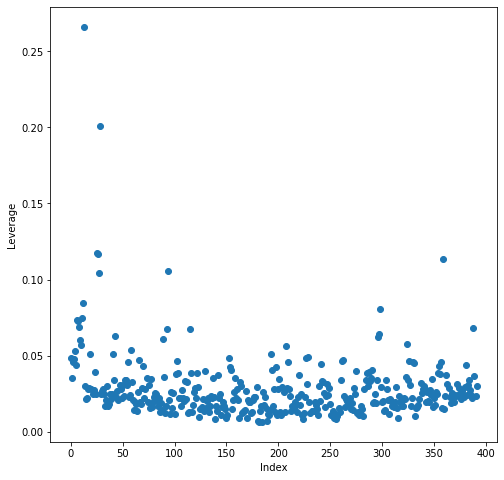

In [23]:
infl = results3.get_influence()
ax = plt.subplots(figsize=(8, 8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel("Index")
ax.set_ylabel("Leverage")
np.argmax(infl.hat_matrix_diag)

In [24]:
X = MS(
    [poly("cylinders", degree=2), poly("horsepower", degree=3), "weight"]
).fit_transform(Auto)
model4 = sm.OLS(y, X)
results4 = model4.fit()
summarize(results4)

,coef,std err,t,P>|t|
intercept,35.2823,1.850,19.069,0.000
"poly(cylinders, degree=2)[0]",-12.1383,10.842,-1.120,0.264
"poly(cylinders, degree=2)[1]",10.5842,4.950,2.138,0.033
"poly(horsepower, degree=3)[0]",-54.3466,10.492,-5.180,0.000
"poly(horsepower, degree=3)[1]",27.1144,4.297,6.310,0.000
"poly(horsepower, degree=3)[2]",-10.0491,4.938,-2.035,0.043
weight,-0.0040,0.001,-6.434,0.000


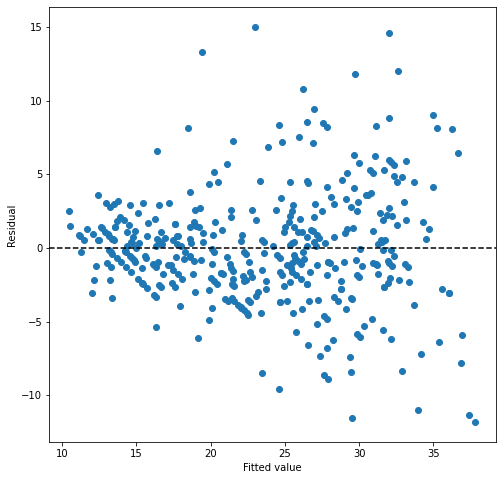

In [25]:
ax = plt.subplots(figsize=(8, 8))[1]
ax.scatter(results4.fittedvalues, results4.resid)
ax.set_xlabel("Fitted value")
ax.set_ylabel("Residual")
ax.axhline(0, c="k", ls="--")

In [26]:
import statsmodels.formula.api as smf

In [27]:
# X = MS(['cylinders', np.log('cylinders'), poly('horsepower',degree=2),'weight', np.sqrt('weight')]).fit_transform(Auto)
model4 = smf.ols(
    "mpg ~ cylinders + np.log(cylinders) + np.power(horsepower,2) + weight + np.sqrt(weight)",
    Auto,
)
results4 = model4.fit()
summarize(results4)

,coef,std err,t,P>|t|
Intercept,123.8869,11.864000,10.443,0.000
cylinders,-0.2931,1.685000,-0.174,0.862
np.log(cylinders),-1.5826,9.103000,-0.174,0.862
"np.power(horsepower, 2)",-0.0001,0.000042,-3.483,0.001
weight,0.0208,0.004000,4.756,0.000
np.sqrt(weight),-2.8956,0.471000,-6.147,0.000


## Q10

In [28]:
Carseats = load_data("Carseats")

In [29]:
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [30]:
X = MS(["Price", "Urban", "US"]).fit_transform(Carseats)
y = Carseats["Sales"]
model5 = sm.OLS(y, X)
# model5 = smf.ols('Sales ~ Price + Urban + US',Carseats)
results5 = model5.fit()
summarize(results5)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


In [31]:
X = MS(["Price", "US"]).fit_transform(Carseats)
model6 = sm.OLS(y, X)
results6 = model6.fit()
summarize(results6)

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


In [32]:
print(results5.rsquared, "\n", results6.rsquared)

0.23927539218405547 
 0.23926288842678567


In [33]:
results6.conf_int(alpha=0.05)

,0,1
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US[Yes],0.69152,1.707766


In [34]:
def resplot(results):
    ax = plt.subplots(figsize=(8, 8))[1]
    ax.scatter(results.fittedvalues, results.resid)
    ax.set_xlabel("Fitted value")
    ax.set_ylabel("Residual")
    ax.axhline(0, c="k", ls="--")


def leverageplot(results):
    infl = results.get_influence()
    ax = plt.subplots(figsize=(8, 8))[1]
    ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
    ax.set_xlabel("Index")
    ax.set_ylabel("Leverage")
    print(np.argmax(infl.hat_matrix_diag))

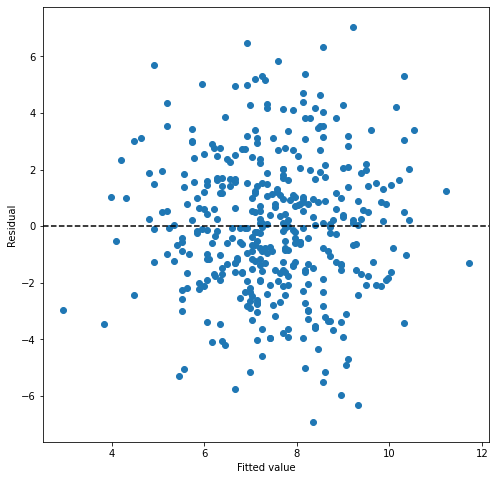

In [35]:
resplot(results6)

42


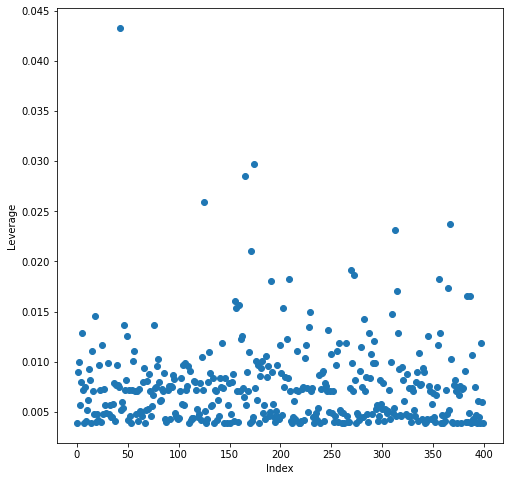

In [36]:
leverageplot(results6)

## Q11

did not understand (d) and (e)

in (f) result_1 is a little different than the others!

In [37]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

In [38]:
df = pd.DataFrame({"y": y})
Y = MS("y", intercept=False).fit_transform(df)
model11_1 = sm.OLS(x, Y)
results11_1 = model11_1.fit()
print(results11_1.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Thu, 12 Oct 2023   Prob (F-statistic):                    6.23e-31
Time:                        08:05:16   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [39]:
df = pd.DataFrame({"x": x})
X = MS("x", intercept=False).fit_transform(df)
model11_2 = sm.OLS(y, X)
results11_2 = model11_2.fit()
print(results11_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Thu, 12 Oct 2023   Prob (F-statistic):                    6.23e-31
Time:                        08:05:16   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### (d)

This is a simple exercise of manipulating the formulas given.

We start with a simplification of a part of the formula for SE(β^)
:

$\sum_{i=1}^{n} (y_i - x_i \beta)^2 = \sum_{i=1}^{n} (y_i^2 - 2 x_i \beta + x_i^2 \beta^2) = \sum_{i=1}^{n} y_i^2 - 2 \beta \sum_{i=1}^{n} x_i + \beta^2 \sum_{i=1}^{n} x_i^2 $

which using the formula (3.38) from the text β^=∑ni=1xiyi/∑nj=1x2j
 becomes:

$ \sum_{i=1}^{n} y_i^2 - 2 \frac{(\sum_{i=1}^{n} x_i y_i)^2}{\sum_{j=1}^{n} x_j^2 } + \frac{(\sum_{i=1}^{n} x_i y_i)^2}{\sum_{j=1}^{n} x_j^2 } = \sum_{i=1}^{n} y_i^2 - \frac{(\sum_{i=1}^{n} x_i y_i)^2}{\sum_{i=1}^{n} x_i^2 }.$

With this, we restart from the formula for the t-statistic and simplify:

$\frac{\hat{\beta}}{SE(\hat{\beta})}= \frac{(\sum_{i=1}^{n} x_i y_i) \sqrt{n-1} \sqrt{\sum_{i=1}^{n} x_i^2} }{ ( \sum_{i=1}^{n} x_i^2 ) \sqrt{\sum_{i=1}^{n} (y_i - x_i \beta)^2}} = \frac{(\sum_{i=1}^{n} x_i y_i) \sqrt{n-1} }{ \sqrt{ (\sum_{i=1}^{n} x_i^2 ) \sum_{i=1}^{n} (y_i - x_i \beta)^2}} $

where we now substitute our previous simplification in the denominator:

$ \frac{(\sum_{i=1}^{n} x_i y_i) \sqrt{n-1} }{ \sqrt{ (\sum_{i=1}^{n} x_i^2 ) \left( \sum_{i=1}^{n} y_i^2 - \frac{(\sum_{i=1}^{n} x_i y_i)^2}{\sum_{i=1}^{n} x_i^2 } \right)}} = \frac{ (\sqrt{n-1} ) \sum_{i=1}^{n} x_i y_i }{ \sqrt{ (\sum_{i=1}^{n} x_i^2 )( \sum_{i=1}^{n} y_i^2 ) - (\sum_{i=1}^{n} x_i y_i)^2 } }, $

as we wanted.



In [40]:
df = pd.DataFrame({"x": x})
X = MS("x", intercept=True).fit_transform(df)
model11_3 = sm.OLS(y, X)
results11_3 = model11_2.fit()
print(results11_3.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Thu, 12 Oct 2023   Prob (F-statistic):                    6.23e-31
Time:                        08:05:17   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [41]:
print(results11_1.tvalues[0])
print(results11_2.tvalues[0])
print(results11_3.tvalues[0])

16.898417063035104
16.898417063035108
16.898417063035108


## Q12

In [42]:
# # Initialize variables
# num_observations = 100

# # Generate random values for x
# x = np.random.uniform(-10, 10, num_observations)  # Adjust the range as needed

# # Calculate the sum of squares for x
# sum_of_squares_x = np.sum(x**2)

# # Calculate y such that sum of y^2 = sum of x^2
# y = np.sqrt(sum_of_squares_x - np.cumsum(x**2))

# # Ensure that y has the same length as x
# y = np.concatenate(([y[0]], np.diff(y)))

In [43]:
x = np.random.rand(100)
y = np.random.randint(-100, 100, 100)

df12_1 = pd.DataFrame({"x": x, "y": y})
X = MS("x", intercept=False).fit_transform(df12_1)
model12_1 = sm.OLS(y, X)
results12_1 = model12_1.fit()
results12_1.params

x   -13.169785
dtype: float64

In [44]:
model12_1_2 = sm.OLS(X, y)
results12_1_2 = model12_1_2.fit()
results12_1_2.params

x1   -0.001351
dtype: float64

In [45]:
x = np.arange(100)
y = np.arange(100)
np.random.shuffle(y)

In [46]:
df12_2 = pd.DataFrame({"x": x, "y": y})
X = MS("x", intercept=False).fit_transform(df12_2)
model12_2 = sm.OLS(y, X)
results12_2 = model12_2.fit()
results12_2.params

x    0.727647
dtype: float64

In [47]:
model12_3 = sm.OLS(X, y)
results12_3 = model12_3.fit()
results12_3.params

x1    0.727647
dtype: float64

## Q13

In [48]:
rng = np.random.default_rng(1)
x = rng.normal(0, 1, size=100)

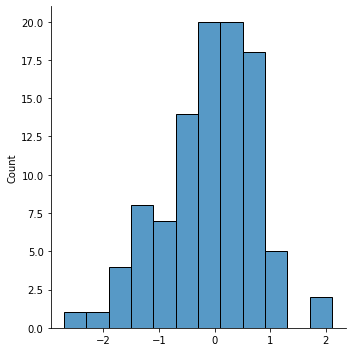

In [49]:
sns.displot(x)

In [50]:
eps = rng.normal(0, 0.25, 100)

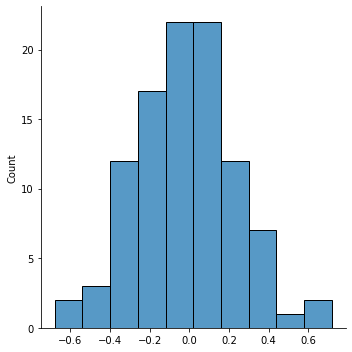

In [51]:
sns.displot(eps)

In [52]:
y = -1 + 0.5 * x + eps
y.shape

(100,)

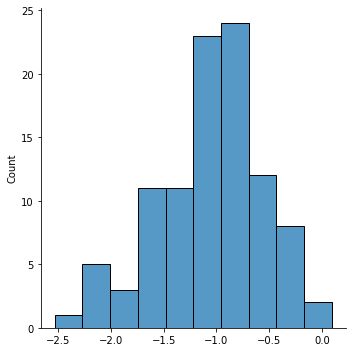

In [53]:
sns.displot(y)

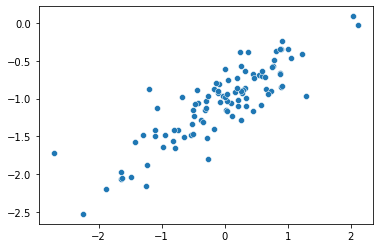

In [54]:
sns.scatterplot(x, y)

In [55]:
df13_1 = pd.DataFrame({"x": x, "y": y})
X = MS("x").fit_transform(df13_1)
model13_1 = sm.OLS(y, X)
results13_1 = model13_1.fit()
summarize(results13_1)

,coef,std err,t,P>|t|
intercept,-1.0190,0.025,-40.537,0.0
x,0.4921,0.029,16.734,0.0


In [56]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

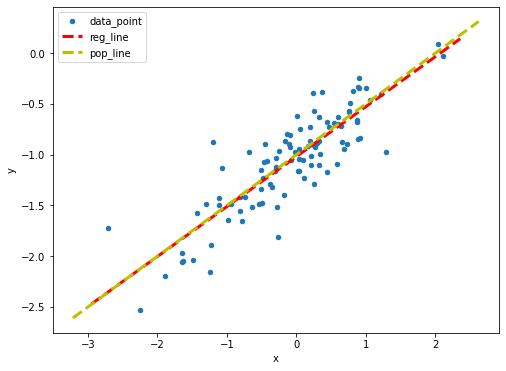

In [57]:
ax = df13_1.plot.scatter("x", "y", figsize=(8, 6))
abline(ax, results13_1.params[0], results13_1.params[1], "r--", linewidth=3)

abline(ax, -1, 0.5, "y--", linewidth=3)

ax.legend(["data_point", "reg_line", "pop_line"])

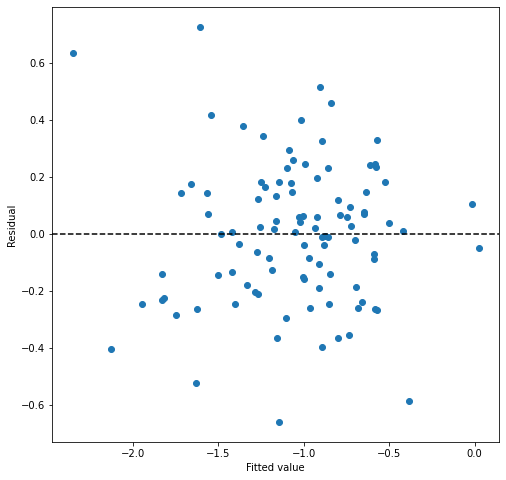

In [58]:
resplot(results13_1)

In [67]:
# X = MS([poly('x',degree=2)]).fit_transform(df13_1)
model13_2 = smf.ols("y ~ x + np.power(x,2)", df13_1)
results13_2 = model13_2.fit()
summarize(results13_2)

,coef,std err,t,P>|t|
Intercept,-1.0182,0.030,-34.186,0.000
x,0.4916,0.032,15.562,0.000
"np.power(x, 2)",-0.0012,0.023,-0.052,0.959


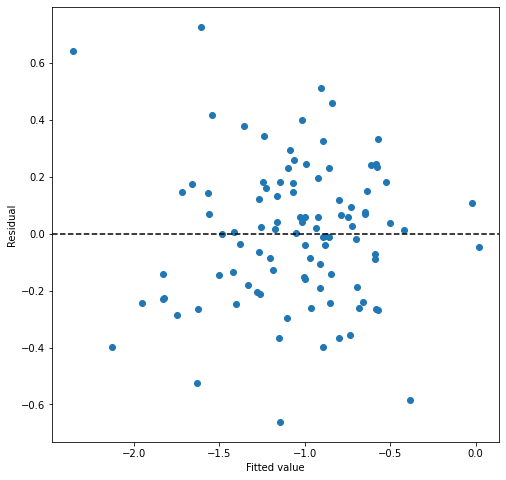

In [60]:
resplot(results13_2)

In [68]:
print(results13_1.rsquared)
print(results13_2.rsquared)

0.7407603575807877
0.7407675414652726


             coef  std err       t  P>|t|
intercept -1.0380    0.050 -20.647    0.0
x          0.4843    0.059   8.233    0.0
0.40889218029885444
                        coef  std err       t  P>|t|
intercept            -1.0737    0.050 -21.326  0.000
poly(x, degree=2)[0]  4.1240    0.503   8.191  0.000
poly(x, degree=2)[1] -0.0261    0.503  -0.052  0.959
0.40890856070369985


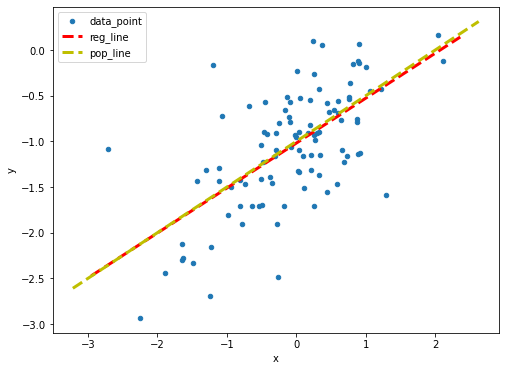

In [63]:
# Data with less/more noise
rng = np.random.default_rng(1)
x1 = rng.normal(0, 1, size=100)
eps1 = rng.normal(0, 0.5, 100)
y1 = -1 + 0.5 * x1 + eps1
df13_2 = pd.DataFrame({"x": x1, "y": y1})
ax = df13_2.plot.scatter("x", "y", figsize=(8, 6))
abline(ax, results13_1.params[0], results13_1.params[1], "r--", linewidth=3)

abline(ax, -1, 0.5, "y--", linewidth=3)

ax.legend(["data_point", "reg_line", "pop_line"])

# Simple Regression
X = MS("x").fit_transform(df13_2)
model13_3 = sm.OLS(y1, X)
results13_3 = model13_3.fit()
print(summarize(results13_3))
print(results13_3.rsquared)

# Polynomial Regression
X = MS([poly("x", degree=2)]).fit_transform(df13_2)
model13_4 = sm.OLS(y1, X)
results13_4 = model13_4.fit()
print(summarize(results13_4))
print(results13_4.rsquared)

## Q14

In [100]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

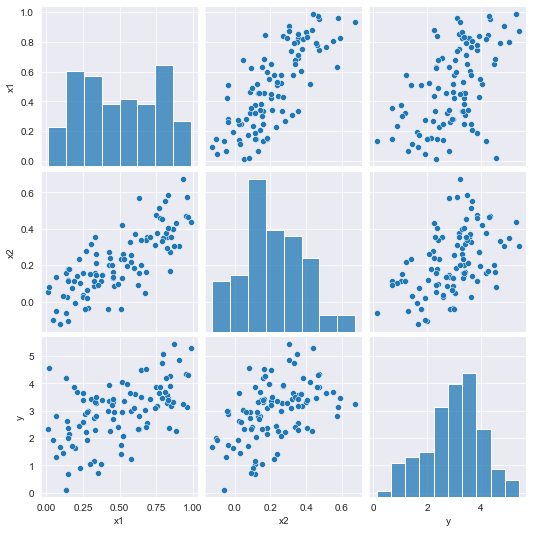

In [101]:
df14 = pd.DataFrame({"x1": x1, "x2": x2, "y": y})

sns.pairplot(df14)

In [102]:
df14.corr()

,x1,x2,y
x1,1.000000,0.772324,0.530531
x2,0.772324,1.000000,0.471356
y,0.530531,0.471356,1.000000


In [103]:
model14_1 = smf.ols('y ~ x1 + x2',df14)
# X = MS(['x1','x2']).fit_transform(df14)
# model14_1 = sm.OLS(y,X)
results14_1 = model14_1.fit()
summarize(results14_1)

,coef,std err,t,P>|t|
Intercept,1.9579,0.190,10.319,0.000
x1,1.6154,0.527,3.065,0.003
x2,0.9428,0.831,1.134,0.259


In [104]:
model14_2 = smf.ols('y ~ x1',df14)
results14_2 = model14_2.fit()
summarize(results14_2)

,coef,std err,t,P>|t|
Intercept,1.9371,0.189,10.242,0.0
x1,2.0771,0.335,6.196,0.0


In [105]:
model14_3 = smf.ols('y ~ x2',df14)
results14_3 = model14_3.fit()
summarize(results14_3)

,coef,std err,t,P>|t|
Intercept,2.3239,0.154,15.124,0.0
x2,2.9103,0.550,5.291,0.0


<class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>


Text(0.5, 0, 'z')

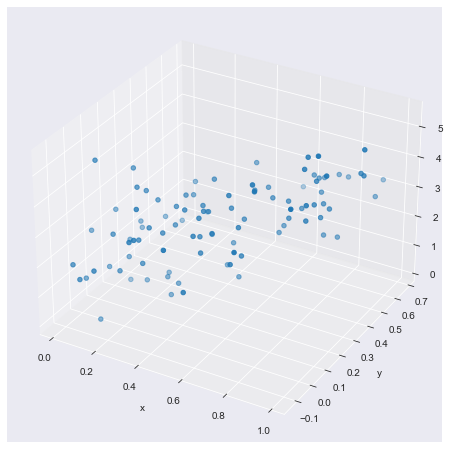

In [106]:
sns.set_style ("darkgrid")
plot_mean = 3
min_num = 30
plt.figure (figsize = (10, 8))
seaborn_plot = plt.axes (projection='3d')
print (type (seaborn_plot))
seaborn_plot.scatter3D (df14['x1'], df14.x2, df14.y)
seaborn_plot.set_xlabel ('x')
seaborn_plot.set_ylabel ('y')
seaborn_plot.set_zlabel ('z')

15


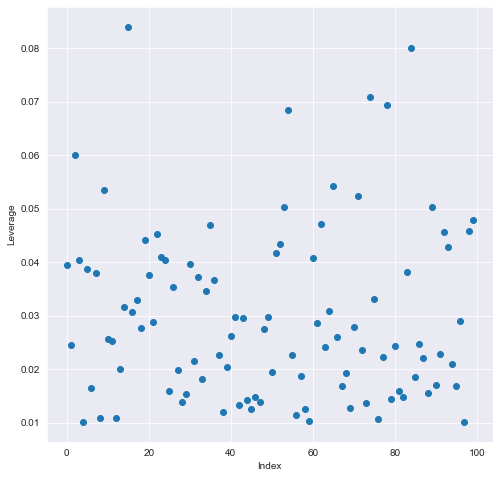

In [107]:
leverageplot(results14_1)

52


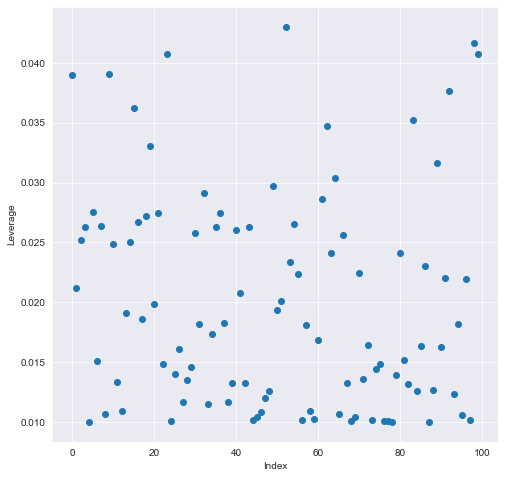

In [108]:
leverageplot(results14_2)

15


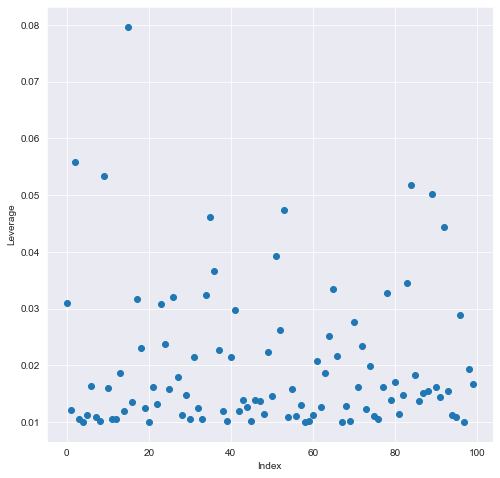

In [109]:
leverageplot(results14_3)

In [110]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

## Q15

In [112]:
Boston = load_data('boston')
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [123]:
y = Boston.crim
predictors = Boston.columns.drop("crim")
results15_a = pd.DataFrame(
    columns=[
        "predictor",
        "beta_0",
        "beta_1",
        "p_value",
        "p_value significant",
        "R_Squared",
    ]
)

for pred in predictors:
    df15 = pd.DataFrame({"x": Boston[pred], "y": y})
    model15 = smf.ols("y ~ x", df15)
    results15 = model15.fit()
    results15_a.loc[len(results15_a.index)] = [
        pred,
        results15.params[0],
        results15.params[1],
        results15.pvalues[1],
        results15.pvalues[1] < 0.01,
        results15.rsquared,
    ]

results15_a

,predictor,beta_0,beta_1,p_value,p_value significant,R_Squared
0,zn,4.453694,-0.073935,5.506472e-06,True,0.040188
1,indus,-2.063743,0.509776,1.450349e-21,True,0.165310
2,chas,3.744447,-1.892777,2.094345e-01,False,0.003124
3,nox,-13.719882,31.248531,3.751739e-23,True,0.177217
4,rm,20.481804,-2.684051,6.346703e-07,True,0.048069
5,age,-3.777906,0.107786,2.854869e-16,True,0.124421
6,dis,9.499262,-1.550902,8.519949e-19,True,0.144149
7,rad,-2.287159,0.617911,2.693844e-56,True,0.391257
8,tax,-8.528369,0.029742,2.357127e-47,True,0.339614
9,ptratio,-17.646933,1.151983,2.942922e-11,True,0.084068


In [124]:
X = MS(Boston.columns.drop('crim')).fit_transform(Boston)
model15_2 = sm.OLS(Boston.crim, X)
results15_2 = model15_2.fit()
summarize(results15_2)

,coef,std err,t,P>|t|
intercept,13.7784,7.082,1.946,0.052
zn,0.0457,0.019,2.433,0.015
indus,-0.0584,0.084,-0.698,0.486
chas,-0.8254,1.183,-0.697,0.486
nox,-9.9576,5.290,-1.882,0.060
rm,0.6289,0.607,1.036,0.301
age,-0.0008,0.018,-0.047,0.962
dis,-1.0122,0.282,-3.584,0.000
rad,0.6125,0.088,6.997,0.000
tax,-0.0038,0.005,-0.730,0.466


<Axes: xlabel='beta_1', ylabel='coef'>

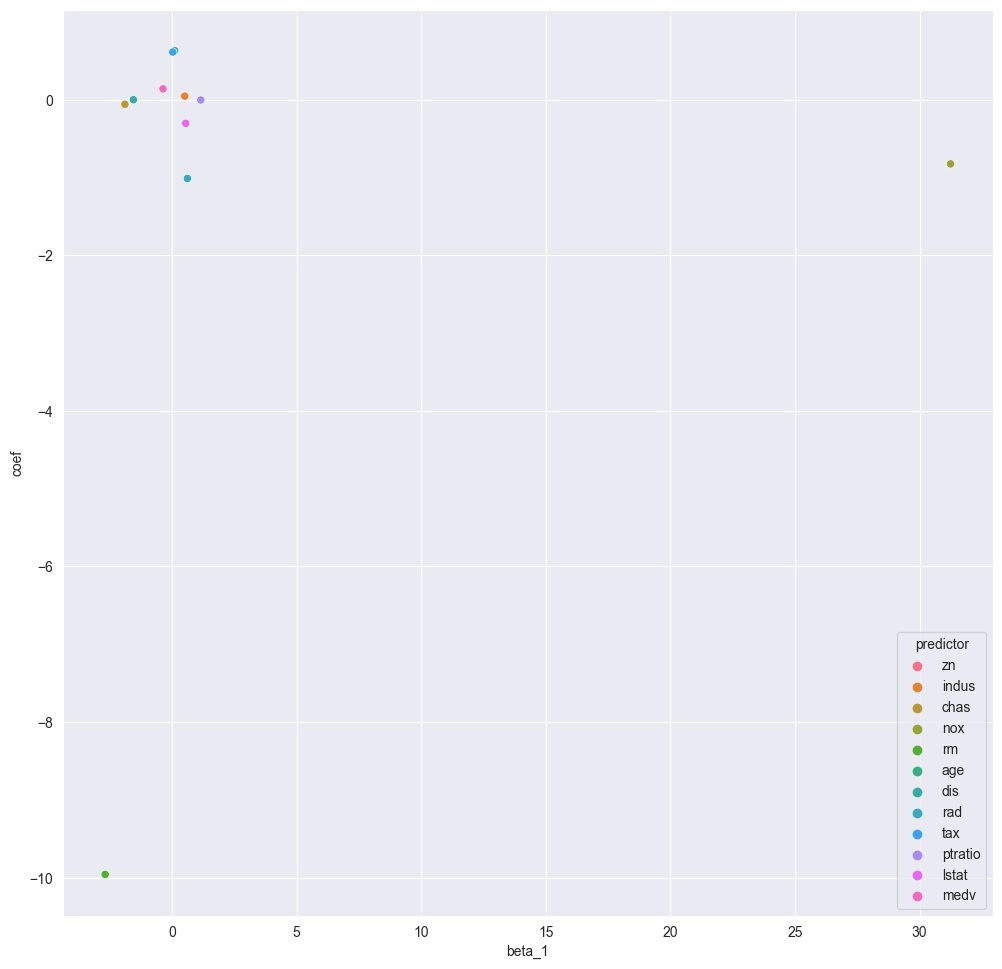

In [139]:
plt.figure(figsize=(12,12),dpi=100)
sns.scatterplot(x=results15_a.beta_1 , y=pd.DataFrame(summarize(results15_2)).reset_index().coef.drop(0),hue=results15_a.predictor)

In [147]:
y = Boston.crim
predictors = Boston.columns.drop("crim")
results15_c = pd.DataFrame(
    columns=[
        "predictor",
        "x p_value",
        "x p_value significant",
        "x2 p_value",
        "x2 p_value significant",
        "x3 p_value",
        "x3 p_value significant",
        "R_Squared",
    ]
)

for pred in predictors:
    df15 = pd.DataFrame({"x": Boston[pred], "y": y})
    model15 = smf.ols("y ~ x + np.power(x,2) + np.power(x,3)", df15)
    results15 = model15.fit()
    results15_c.loc[len(results15_c.index)] = [
        pred,
        results15.pvalues[1],
        results15.pvalues[1] < 0.05,
        results15.pvalues[2],
        results15.pvalues[2] < 0.05,
        results15.pvalues[3],
        results15.pvalues[3] < 0.05,
        results15.rsquared,
    ]

results15_c

,predictor,x p_value,x p_value significant,x2 p_value,x2 p_value significant,x3 p_value,x3 p_value significant,R_Squared
0,zn,2.612296e-03,True,9.375050e-02,False,2.295386e-01,False,0.058242
1,indus,5.297064e-05,True,3.420187e-10,True,1.196405e-12,True,0.259658
2,chas,6.812800e-01,False,6.812800e-01,False,6.812800e-01,False,0.003120
3,nox,2.758372e-13,True,6.811300e-15,True,6.961110e-16,True,0.296978
4,rm,2.117564e-01,False,3.641094e-01,False,5.085751e-01,False,0.067786
5,age,1.426608e-01,False,4.737733e-02,True,6.679915e-03,True,0.174231
6,dis,6.374792e-18,True,4.941214e-12,True,1.088832e-08,True,0.277825
7,rad,6.234175e-01,False,6.130099e-01,False,4.823138e-01,False,0.400037
8,tax,1.097075e-01,False,1.374682e-01,False,2.438507e-01,False,0.368882
9,ptratio,3.028663e-03,True,4.119552e-03,True,6.300514e-03,True,0.113782


In row 7 (rad) r-square is 40% but p_value for x, x2 , and x3 is not significant; how is it explained?